# Predict Game Output in League Of Legends
---
**Por: Ian Joab Padron Corona - A01708940**

## Librerias

In [1]:
'''
===============================================================================
Librerias de Python a utilizar en el proyecto
===============================================================================
pandas: Libreria de manipulacion de datos en DataFrames
numpy: Libreria para operaciones matematicas y manipulacion de arreglos
seaborn: Libreria para visualizacion de datos
matplotlib: Libreria para graficar
tensorflow: Libreria de aprendizaje profundo
keras: API de alto nivel para crear redes neuronales
Sequential: API para crear modelos de redes neuronales
Dense: Capa densa (fully connected)
OneHotEncoder: Convertir variables categoricas en numericas creando columnas binarias. ESTE SOLO PARA EL DE TETRIS
MinMaxScaler: Normaliza los datos entre 0 y 1
train_test_split: Divide los datos en conjuntos de entrenamiento y prueba
classification_report: Genera un informe de clasificacion
confusion_matrix: Crea una matriz de confusiones
===============================================================================
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2025-04-06 19:17:05.887763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743988626.042760   12461 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743988626.084877   12461 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743988626.442785   12461 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743988626.442809   12461 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743988626.442810   12461 computation_placer.cc:177] computation placer alr

## Datos

In [2]:
data = pd.read_csv('../content/tl-data-09-2023.csv', low_memory=False)
# Eliminar columnas innecesarias
data.drop(columns=['id', 'username', 'country', 'bestrank', '40l_sprint', 'blitz'], inplace=True)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45197 entries, 0 to 45196
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gamesplayed  45197 non-null  int64  
 1   gameswon     45197 non-null  int64  
 2   tr           45197 non-null  float64
 3   glicko       45197 non-null  float64
 4   rd           45197 non-null  float64
 5   rank         45197 non-null  object 
 6   apm          45197 non-null  float64
 7   pps          45197 non-null  float64
 8   vs           45197 non-null  float64
 9   verified     45197 non-null  bool   
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 3.1+ MB
None


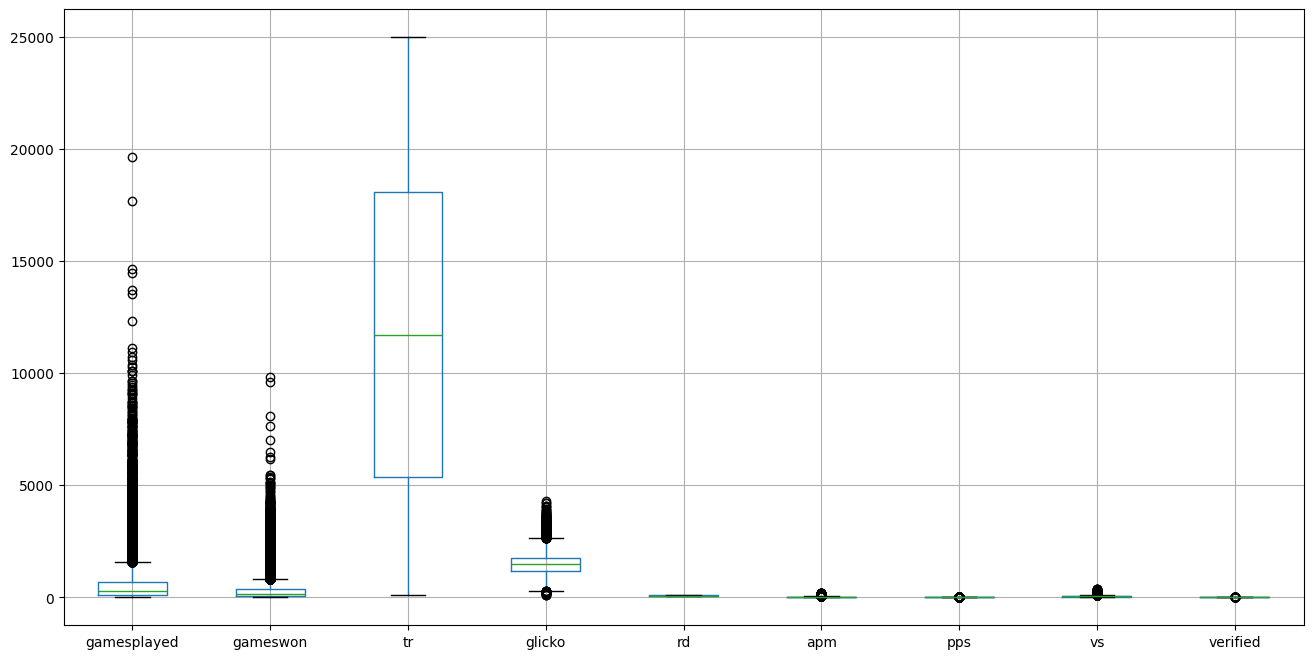

In [24]:
data.boxplot(figsize = (16, 8))
plt.show()

## Escalamiento

In [5]:
# scaler = MinMaxScaler()

# # Escalamiento de las columnas con valores muy grandes
data_scaled = data.copy()
# rank_column = data_scaled['rank']
# data_scaled.drop(columns=['rank'], inplace=True)
# data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=data_scaled.columns)
# data_scaled['rank'] = rank_column

# del rank_column

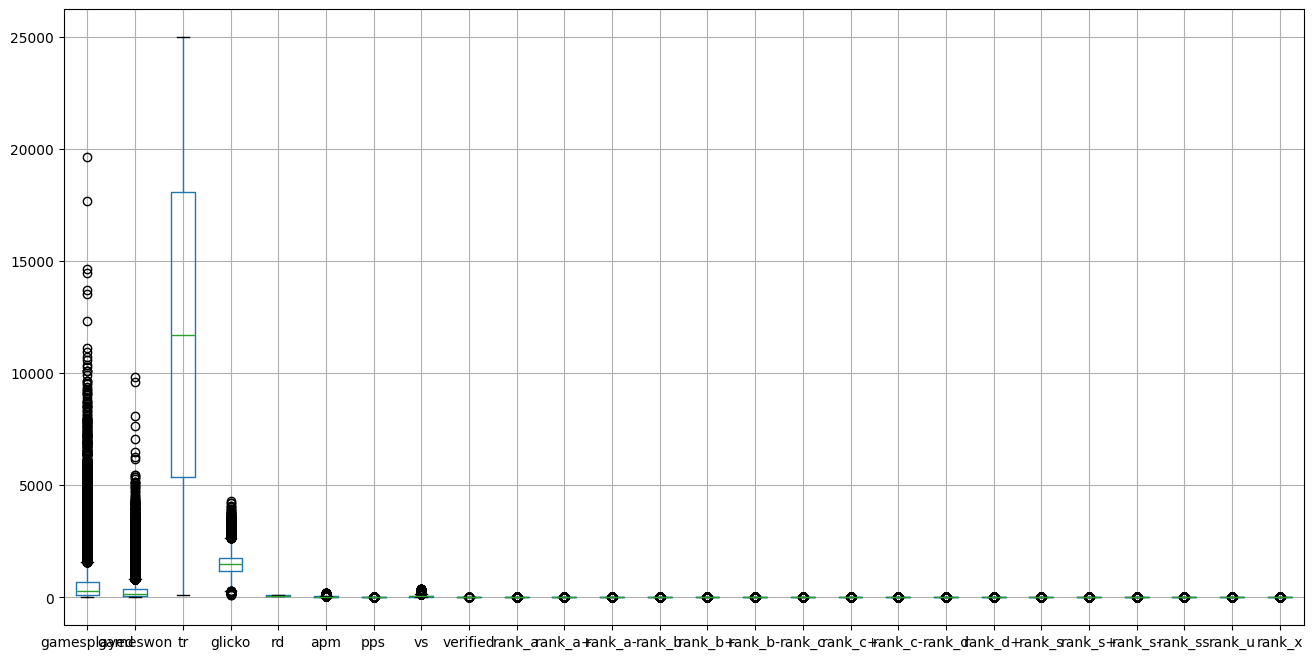

In [25]:
data_scaled.boxplot(figsize = (16, 8))
plt.show()

### OneHotEncoder

In [7]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the 'rank' column
rank_encoded = encoder.fit_transform(data[['rank']])

# Convert the encoded result to a DataFrame
rank_encoded_df = pd.DataFrame(rank_encoded, columns=encoder.get_feature_names_out(['rank']))

rank_columns = rank_encoded_df.columns.tolist()

# Concatenate the encoded 'rank' column back to the original DataFrame
data_scaled = pd.concat([data_scaled, rank_encoded_df], axis=1)

# Drop the original 'rank' column
data_scaled = data_scaled.drop(columns=['rank'])

del rank_encoded_df, rank_encoded

## Separacion

In [8]:
# Asignar las 'features; X' y la 'target variable; y'
X = data_scaled.drop(columns=rank_columns)
y = data_scaled[rank_columns]

# Dividir los datos en en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.80,
                                                    random_state = 42,
                                                    shuffle      = True
                                                    )

## Modelo

### Classifier

In [9]:
def model_simple(shape):
    """
    This is a simple model multilayer perceptron or neural network.
    Your function should return the model.
    """
    model  =  Sequential([
                    Dense(64, activation='relu', input_shape=shape),
                    Dense(64, activation='relu'),
                    Dense(17, activation='softmax')
            ])
    return model

In [10]:
def compile_model_simple(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric.
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= "adam",
                  loss = "categorical_crossentropy",
                  metrics=['accuracy'])

In [11]:
def train_model_simple(model, train_features, train_labels):
    """
    Train the model on the scaled_train_images and train_labels.
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(train_features, train_labels, epochs = 20)

In [12]:
model_nn = model_simple(X_train.shape[1:])
model_nn.summary()

/home/user326/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1743988632.130064   12461 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4699 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,905 (23.07 KB)

 Trainable params: 5,905 (23.07 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
compile_model_simple(model_nn)

In [14]:
history_nn = train_model_simple(model_nn, X_train, y_train)

Epoch 1/20


I0000 00:00:1743988634.287466   15531 service.cc:152] XLA service 0x7f1ad0009e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743988634.287502   15531 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-04-06 19:17:14.334249: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743988634.517372   15531 cuda_dnn.cc:529] Loaded cuDNN version 90300


  45/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1086 - loss: 1720.2727

I0000 00:00:1743988635.449063   15531 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1130/1130 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3132 - loss: 226.5464
Epoch 2/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5281 - loss: 12.4042
Epoch 3/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6168 - loss: 7.8993
Epoch 4/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6592 - loss: 6.1102
Epoch 5/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6864 - loss: 5.9334
Epoch 6/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7339 - loss: 4.1506
Epoch 7/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7605 - loss: 3.2402
Epoch 8/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7681 - loss: 3.2054
Epoch 9/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7945 - loss: 2.3782
Epoch 10/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8237 - loss: 1.4032
Epoch 11/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8306 - loss: 1.0426
Epoch 12/20
1130/1130 ━━━━━━━━━━━━━━━━

### Plot accuracy

In [15]:
frame = pd.DataFrame(history_nn.history)

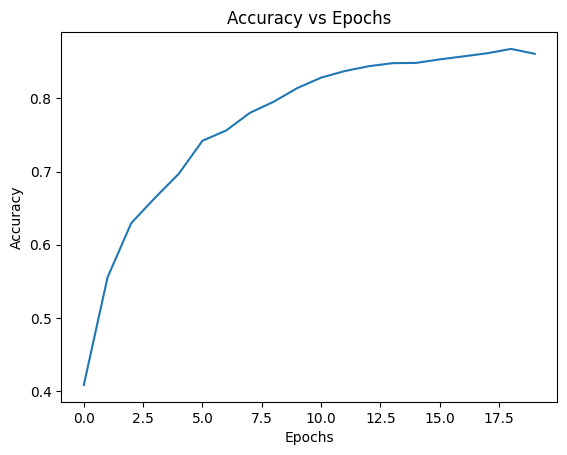

In [26]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

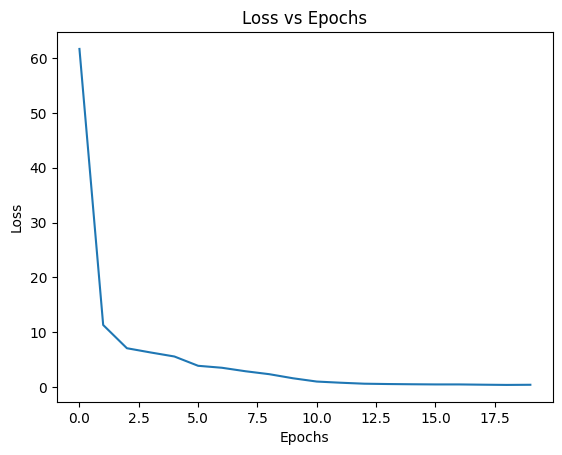

In [27]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

### Evaluacion

In [18]:
def evaluate_model(model, test_features, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels.
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(test_features, test_labels)
    return (test_loss, test_accuracy)

In [19]:
# Run your function to evaluate the model Neural Network Dense Layers

test_loss, test_accuracy = evaluate_model(model_nn, X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8403 - loss: 0.4666
Test loss: 0.4612
Test accuracy: 0.8362


In [21]:
# Predicciones y métricas
preds = model_nn.predict(X_test)
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test.values, axis=1)
class_labels = list(y_test.columns)

print("\n Reporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Reporte de clasificación:

              precision    recall  f1-score   support

      rank_a       0.93      0.91      0.92       694
     rank_a+       0.82      0.99      0.90       706
     rank_a-       0.99      0.89      0.94       762
      rank_b       1.00      0.89      0.94       729
     rank_b+       0.93      0.99      0.96       708
     rank_b-       0.79      1.00      0.88       699
      rank_c       0.89      0.98      0.93       564
     rank_c+       1.00      0.67      0.80       542
     rank_c-       0.95      0.99      0.97       477
      rank_d       1.00      0.93      0.97       237
     rank_d+       0.93      0.94      0.93       238
      rank_s       0.56      0.58      0.57       507
     rank_s+       0.67      0.45      0.54       564
     rank_s-       0.77      0.82      0.79       601
     rank_ss       0.67      0.32      0.43       543
      rank_u       0.53      0.97      0.69       372
      rank_

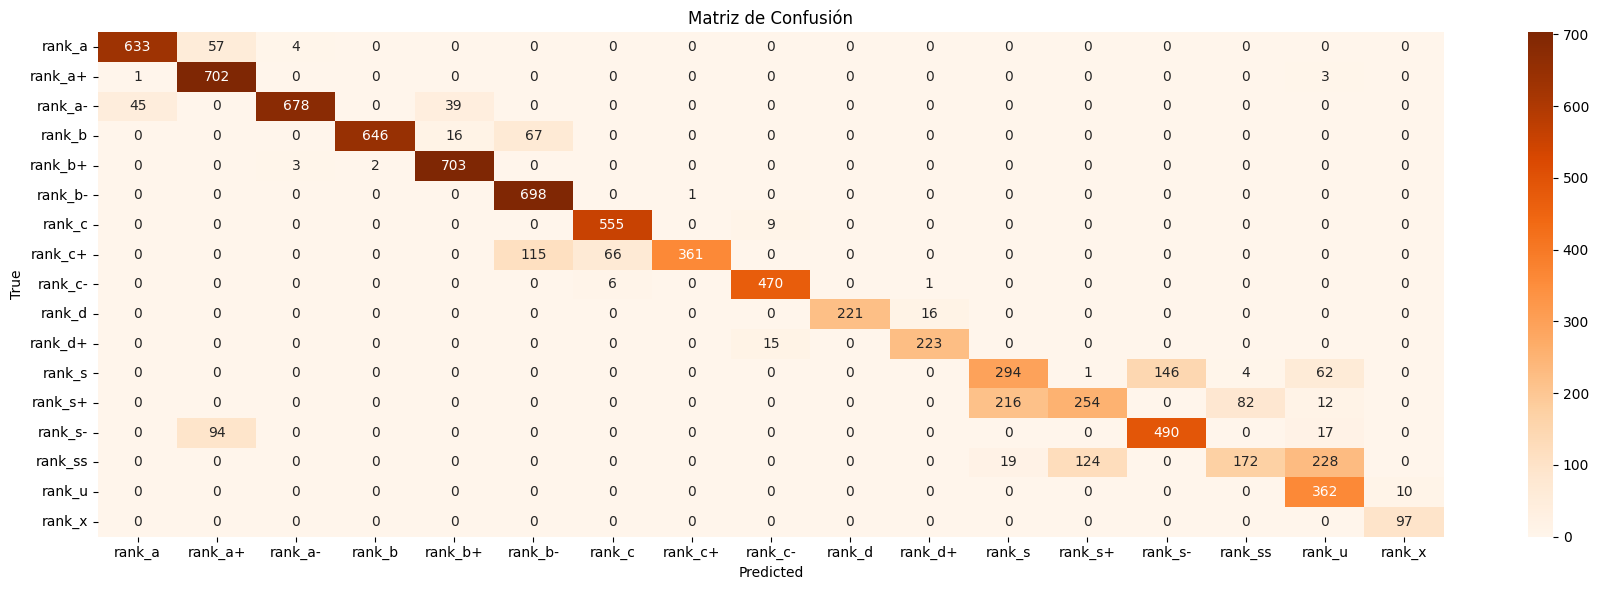

In [40]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()